In [2]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split



In [45]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,0:n-7]
y_train = X[:,65:71]


#Test data 
x_test = X1[:,0:n-7]
y_test = X1[:,65:71]

y_class_test=X1[:,64]


In [46]:
print(len(x_train))
print(np.shape(x_train))

624
(624, 64)


In [54]:
x_train[0::2]

array([[1.53739090e-02, 8.52083700e-03, 7.25140480e-02, ...,
        1.05110586e+00, 9.62306103e-01, 1.76000000e-05],
       [1.00000000e+00, 2.98434315e-01, 1.00000000e+00, ...,
        9.47768983e-01, 1.05049811e+00, 5.01683540e-02],
       [2.49319582e-01, 8.06432680e-02, 1.92366226e-01, ...,
        1.30364188e+00, 1.00893665e+00, 1.02769700e-03],
       ...,
       [2.32390450e-02, 1.22006820e-02, 1.38629252e-01, ...,
        1.15348824e+00, 9.86817444e-01, 1.69000000e-05],
       [1.00000000e+00, 2.59429198e-01, 1.00000000e+00, ...,
        8.53206535e-01, 9.87583901e-01, 5.45115390e-02],
       [3.15583213e-01, 8.19229590e-02, 1.02769108e-01, ...,
        1.12806468e+00, 1.01548630e+00, 1.00955200e-03]])

In [73]:
x_train_cl=[]

for i in range(len(x_train)):
    x_train_cl.append([])
    h=0
    for j in range (0, 8):
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][0+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][1+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][4+8*j]
        h=h+1
        

        
            

In [81]:
print(np.shape(x_train_cl))
print(h)
print((x_train_cl))


(624, 24)
96
[[0.015373909, 0.008520837, 0.374168797, 0.076033213, 0.041923903, 1.840764938, 0.076829878, 0.041436641, 1.819187351, 0.092377611, 0.014625923, 0.641558551, 0.038971182, 0.017801171, 0.781620695, 0.137592325, 0.029441837, 1.291930295, 0.026001222, 0.014726388, 0.646748024, 0.022704208, 0.013755793, 0.60402135], [0.756003442, 0.213695898, 0.92869656, 0.654017912, 0.220770561, 0.959341795, 0.460814721, 0.163854718, 0.71195217, 0.440524104, 0.184399367, 0.801283156, 0.263866401, 0.107472485, 0.466950865, 0.705230533, 0.244789684, 1.063623966, 0.937887953, 0.288969573, 1.255790605, 0.918137033, 0.417025259, 1.812360883], [1.0, 0.298434315, 1.513131861, 1.0, 0.263349858, 1.335185943, 0.279580335, 0.098862206, 0.501186895, 0.267924137, 0.085506015, 0.433510129, 0.580275396, 0.173690077, 0.880615844, 0.576733186, 0.166549405, 0.844398294, 0.816545915, 0.227675613, 1.154357078, 1.0, 0.263820088, 1.337613956], [0.513535254, 0.068889216, 0.316602776, 0.595113787, 0.194414346, 0.893

In [91]:
from sklearn.cluster import AgglomerativeClustering
clus=3
xx1_train=((x_train_cl))
cluster = AgglomerativeClustering(n_clusters=clus, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(xx1_train)

In [83]:
from sklearn.cluster import AgglomerativeClustering
clus=3
#cluster=[]
clusters=[]
cx1=[]
cy1=[]

for f in range(len(x_train_cl)):
    #cluster.append([])
    cx1.append([])
    cy1.append([])
    clusters.append([])
    xx1_train=(x_train_cl[f])
    cluster = AgglomerativeClustering(n_clusters=clus, affinity='euclidean', linkage='ward')
    clusters[f]=cluster.fit_predict(xx1_train)


    for i in range (0,clus):
        cx1[f].append([])
        cy1[f].append([])
        h=0
        for j in range (len(clusters[f])-1):
            
            if clusters[f][j]==i:
                cx1[f][i].append([])
                cy1[f][i].append([])
                cx1[f][i][h]=x_train[j,:]
                cy1[f][i][h]=y_train[j,:]
                h=h+1
    

ValueError: Expected 2D array, got 1D array instead:
array=[0.01537391 0.00852084 0.3741688  0.07603321 0.0419239  1.84076494
 0.07682988 0.04143664 1.81918735 0.09237761 0.01462592 0.64155855
 0.03897118 0.01780117 0.78162069 0.13759232 0.02944184 1.2919303
 0.02600122 0.01472639 0.64674802 0.02270421 0.01375579 0.60402135].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
print(clusters)
print(len(clusters))
x_train_cl=np.asarray(x_train_cl)

[2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 2
 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 1 1 1 0 0 2 0
 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0
 1 1 0 2 0 1 1 0 0 2 0 0 1 2 0 2 0 1 2 0 0 2 0 0 1 0 0 2 0 1 0 0 0 2 0 0 1
 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1
 0 2 0 1 1 0 0 0 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 2 0 2 0 1 1 0 0 2 0 0 1 1 0
 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 2 0 2
 0 1 2 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 0 0
 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 1 1 1 1 1 1 0 1
 1 1 1 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1
 0 0 2 0 0 1 1 0 0 0 0 1 1 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0
 0 2 0 0 1 0 0 2 0 1 0 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 2
 0 0 1 1 0 2 1 1 1 1 0 0 

624


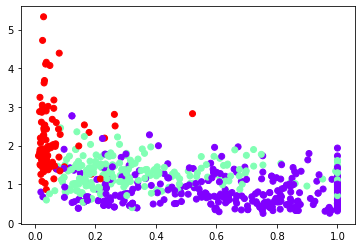

In [104]:
from mpl_toolkits.mplot3d import Axes3D
print(len(clusters))
plt.scatter(x_train_cl[:,0],x_train_cl[:,8], c=cluster.labels_, cmap='rainbow')

In [25]:
print((1/6)%(1/6))

0.0
